# 파이썬 뉴스 텍스트 워드 클라우드

<img src="https://i.imgur.com/jd1VoSE.png" >


### 2018 http://financedata.kr
<!-- TEASER_END -->

# 뉴스 워드 클라우드
* feedparser, newspaper, konlpy 등 다양한 파이썬 라이브러를 활용
* 뉴스 텍스트 데이터 수집, 전처리, 형태소 분석(명사추출), 출현 회수 카운트, 클라우드로 시각화까지 진행
* (import를 제외하면) 약 20라인 정도의 코드 

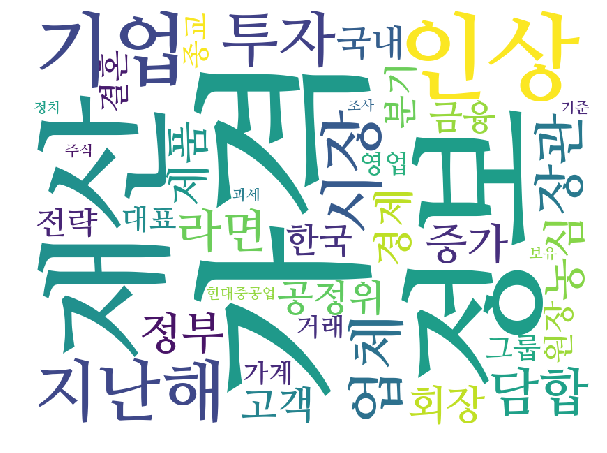

In [1]:
%matplotlib inline
import feedparser
import newspaper
from konlpy.tag import Mecab
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def draw_wordcloud_from_rss(rss_link):
    #  feedparser, newspaper: RSS를 통해 뉴스의 본문을 수집
    feeds = feedparser.parse(rss_link)
    links = [entry['link'] for entry in feeds['entries']]

    news_text =''
    for link in links:
        article = newspaper.Article(link, language='ko')
        article.download()
        article.parse()
        news_text += article.text

    # konlpy, Mecab: 형태소 분석을 통해 본문에서 명사추출, 1글자는 단어는 삭제
    engine = Mecab() 
    nouns = engine.nouns(news_text)
    nouns = [n for n in nouns if len(n) > 1]

    # Counter: 단어수 세기, 가장 많이 등장한 단어(명사) 40개
    count = Counter(nouns)
    tags = count.most_common(40)

    # WordCloud, matplotlib: 단어 구름 그리기
    font_path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'
    wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600)
    cloud = wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10,8))
    plt.axis('off')
    plt.imshow(cloud)
    
# 경향신문 경제뉴스 RSS
rss_link = 'http://www.khan.co.kr/rss/rssdata/economy.xml'
draw_wordcloud_from_rss(rss_link)

# 1) feedparser: 뉴스 링크 수집
* feedparser: RSS feed 파싱 라이브러리
* 경향신문 경제뉴스 RSS를 통해 경제 뉴스 링크 수집(30개)

In [2]:
import feedparser

#  경향닷컴 경제뉴스 RSS
feeds = feedparser.parse('http://www.khan.co.kr/rss/rssdata/economy.xml')
links = [entry['link'] for entry in feeds['entries']]
links

['http://news.khan.co.kr/kh_news/khan_art_view.html?artid=201203251835221&code=920100',
 'http://news.khan.co.kr/kh_news/khan_art_view.html?artid=201203251356231&code=920401',
 'http://news.khan.co.kr/kh_news/khan_art_view.html?artid=201203251356161&code=920401',
 'http://news.khan.co.kr/kh_news/khan_art_view.html?artid=201203251355591&code=920401',
 'http://news.khan.co.kr/kh_news/khan_art_view.html?artid=201203251128101&code=920100',
 'http://news.khan.co.kr/kh_news/khan_art_view.html?artid=201203231743501&code=920301',
 'http://news.khan.co.kr/kh_news/khan_art_view.html?artid=201203231411441&code=920100',
 'http://news.khan.co.kr/kh_news/khan_art_view.html?artid=201203231410391&code=920100',
 'http://news.khan.co.kr/kh_news/khan_art_view.html?artid=201203231409321&code=920100',
 'http://news.khan.co.kr/kh_news/khan_art_view.html?artid=201203231311491&code=920100',
 'http://news.khan.co.kr/kh_news/khan_art_view.html?artid=201203231142301&code=920401',
 'http://news.khan.co.kr/kh_news

 # 2) newspaper: 뉴스 본분 수집
* newspaper: HTML문서에서 제목, 본문 등을 자동 식별하여 텍스트를 추출하는 라이브러리
* 본문(article.text)를 모두 news_text에 누적하여 저장
* 30개 뉴스의 본문 길이가 27213 자

In [3]:
import newspaper

news_text =''
for link in links:
    article = newspaper.Article(link, language='ko')
    article.download()
    article.parse()
    news_text += article.text

news_text[:1000]

'ㆍ중기청장과 밤샘토론\n\n\n\n“정부가 창업 숫자를 강조하기보다 성공률을 생각해야 한다.” “좋은 제품을 개발해도 벤처기업은 판로를 뚫기가 어렵다.” “연구·개발 투자에만 2년이 걸리는데 창업자금은 3년 안에 갚으라고 한다.”\n\n\n\n지난 22일 경기 안산시 청년창업사관학교. 송종호 중소기업청장(56)과 청년창업자 및 사관학교 입교자 150여명이 밤샘토론을 벌였다. 창업자들은 현장에서 겪는 갖가지 어려움을 쏟아냈다. 자금만 찔끔 지원하고는 후속대책은 세워주지 않는 정부의 무책임에 대한 질타도 있었다. 22일 자정 시작된 토론회는 예정된 시간보다 1시간30분 늦은 23일 새벽 4시30분이 돼서야 마무리됐다.\n\n\n\n신발제조업체를 운영하는 권종익씨(29)는 “중기청에서 기술개발자금을 지원하지만 막상 개발을 마치고 양산하려는 시점에 돈이 부족해 사업이 한 템포 늦춰졌다. 게다가 신발제조업은 전략산업이 아니라는 이유로 생산단계에서는 자금을 지원하지 않는다”고 말했다.\n\n\n\n정부는 현실을 몰랐고, 의욕은 있었지만 드러난 문제에 대한 확실한 해결방안도 내놓지 못했다.\n\n\n\n송종호 청장은 “신발이 전략산업이 아닐 리 없는데…. 담당이 답을 해보라”고 하자 실무자는 “복잡해서 알아보는 데 시간이 걸린다”고 어물쩍 넘어가려 했다. 송 청장이 “끝장토론이다. 알아보고 여기서 답을 주라”고 목소리를 높이자 잠시 뒤 “신발은 전략산업에 해당하지 않는다”는 실무자의 답변이 나왔다. 송 청장은 “전략적으로 (신발산업 지원 방안을) 검토해보자”는 두루뭉술한 해법을 내놓았다.\n\n\n\n창업자금 상환기간이 촉박하다는 지적도 있었다. 곽민홍씨(36)는 “상환 조건이 1년 거치 2년 상환이다. 연구·개발 투자만 2년씩 걸리는 우리 업종의 경우 2년째부터 한 달에 400만원씩 상환하는 것이 엄청난 부담이다”라고 말했다. 중기청 김현태 융자사업처장은 “자금을 빌려주는 기업은행과 우리은행이 부담을 느끼고 있어 쉽지 않다”고 말했다. 송 청장은 “은행과 협의해 보겠다

In [4]:
len(news_text)

27213

# 3) KoNLpy + Mecab: 형태소 분석
* 형태소 분석기로 명사만 추출
* 1글자는 의미가 없다고 보고 삭제

In [5]:
from konlpy.tag import Mecab

engine = Mecab() 
nouns = engine.nouns(news_text)

In [6]:
len(nouns)

5506

In [7]:
nouns = [n for n in nouns if len(n) > 1]
nouns[:20]

['밤샘',
 '토론',
 '정부',
 '창업',
 '숫자',
 '강조',
 '성공',
 '생각',
 '제품',
 '개발',
 '벤처',
 '기업',
 '판로',
 '연구',
 '개발',
 '투자',
 '창업',
 '자금',
 '경기',
 '안산시']

# 4) Counter: 단어 개수를 세기
* 단어의 개수를 세고,
* 가장 많이 등장한 N개 구하기 (Counter.most_common())

In [8]:
from collections import Counter

count = Counter(nouns)
tags = count.most_common(40)
tags[:20]

[('가격', 65),
 ('정보', 40),
 ('재산', 35),
 ('인상', 33),
 ('기업', 30),
 ('지난해', 30),
 ('시장', 29),
 ('투자', 27),
 ('업체', 26),
 ('담합', 21),
 ('장관', 21),
 ('농심', 20),
 ('라면', 20),
 ('정부', 20),
 ('제품', 20),
 ('증가', 19),
 ('경제', 18),
 ('회장', 18),
 ('공정위', 16),
 ('고객', 16)]

# 5) WordCloud, matplotlib: 단어 구름 그리기
* WordCloud 로 워드 클라이우드 이미지 생성

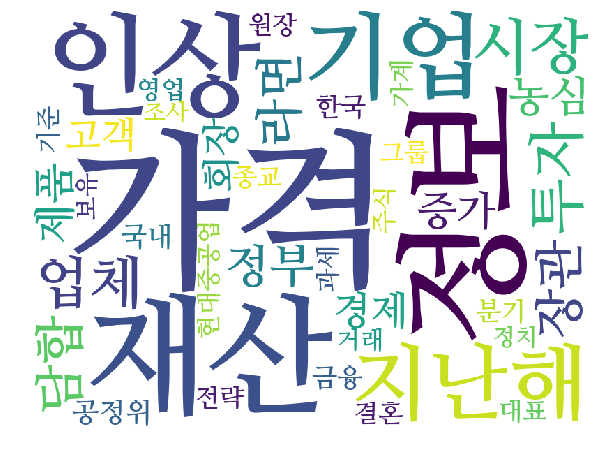

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

font_path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'

wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)

# RSS 워드 클라우드 예제

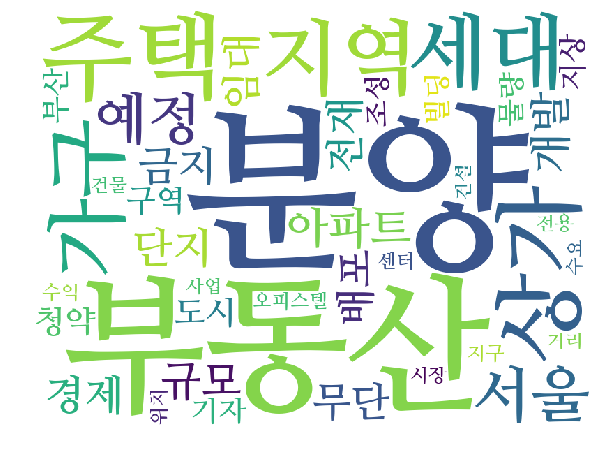

In [10]:
# 매경경제 증권
draw_wordcloud_from_rss('http://file.mk.co.kr/news/rss/rss_50300009.xml')

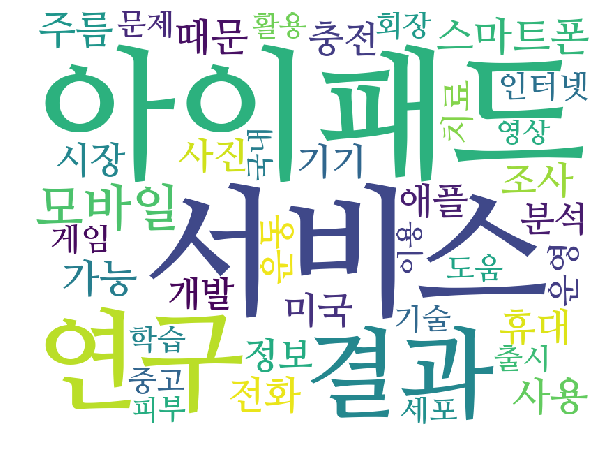

In [11]:
# 경향신문 IT 과학 부문
draw_wordcloud_from_rss('http://www.khan.co.kr/rss/rssdata/itnews.xml')

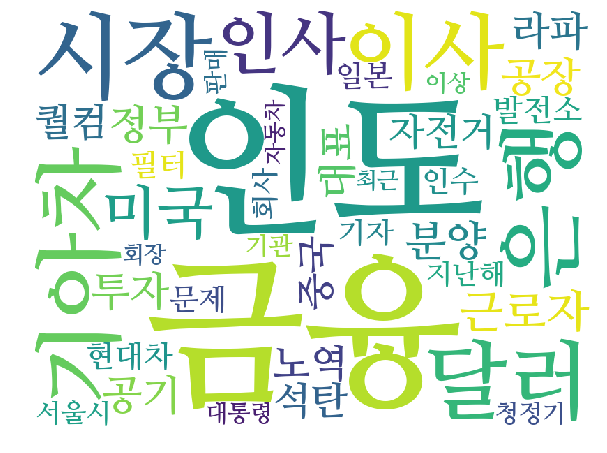

In [12]:
# 한국경제 주요 뉴스
draw_wordcloud_from_rss('http://rss.hankyung.com/new/news_main.xml')

### 2018 http://financedata.kr